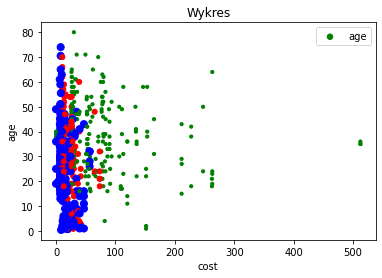

In [39]:
import pandas as pd
import numpy as np
from typing import Dict
import matplotlib.pyplot as plt

data: pd.DataFrame = pd.read_csv('dane.csv', sep='^')
    
data = data.select_dtypes(include=['number'])

def get_column_name(df: pd.DataFrame, mean: float, std: float) ->str:
     for i in df.columns:
        if round(df[str(i)].mean(), 6) == mean:
            return str(i)

col_rename: Dict[str,str] ={
    get_column_name(data, 2.308642, 10):'class',
    get_column_name(data, 0.383838, 10):'survived',
    get_column_name(data, 446.000000, 10):'passengerId',
    get_column_name(data, 29.699118, 10):'age',
    get_column_name(data, 32.204208, 10):'cost'}
    
data = data.rename(columns = col_rename)

x: np.ndarray = data['cost'].values
y: np.ndarray = data['age'].values

kolory: np.ndarray = np.empty((0,len(x)), str)
rozmiar: np.ndarray = np.empty((0,len(x)), int)
klasa: np.ndarray = data['class'].values
plt.xlabel('cost')
plt.ylabel('age')

for i in range(len(klasa)):
    if klasa[i] == 1:
        kolory = np.append(kolory, 'g')
        rozmiar = np.append(rozmiar, 10)
    elif klasa[i] == 2:
        kolory = np.append(kolory, 'r')
        rozmiar = np.append(rozmiar, 25)
    else:
        kolory = np.append(kolory, 'b')
        rozmiar = np.append(rozmiar, 50)


plt.scatter(x='cost', y='age', c=kolory, s=rozmiar, data=data)

plt.title('Wykres')
plt.legend()
plt.show()